# Finding Percentage of Support Vectors in a SVC model

## Importing Packages

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Reading CSV

In [32]:
df = pd.read_csv('eclipse_jdt.csv')

## Data Pre-Processing

### Data Transformation

In [33]:
df['text'] = df['Title'] + ' ' + df['Description']
df = df.drop(columns=['Title','Description'])

### Data Filtering

In [34]:
df = df[df['text'].str.len() > 50]

## Data Visualization

### **Priority** Distribution Visualization

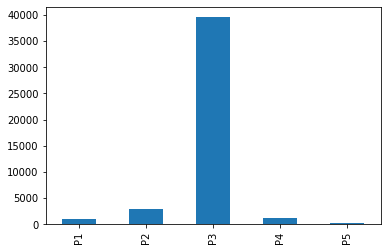

In [35]:
df['Priority'].value_counts().sort_index().plot(kind='bar')
plt.show()

## Balancing the Dataset

In this section, we try to balance a category of **Priority**, with the rest.

### Downsampling the biggest priority to relevant numbers

In [36]:
df_sampleP3 = df[df['Priority'] == 'P3'].sample(n=4000)
df_sampleRest = df[df['Priority'] != 'P3']
df_balanced = pd.concat([df_sampleRest, df_sampleP3])
print(df_balanced['Priority'].value_counts())

P3    4000
P2    3040
P4    1141
P1    1117
P5     252
Name: Priority, dtype: int64


### Dropping NA values

In [37]:
df = df_balanced[['text', 'Priority']]
df = df.dropna()

### **Priority** Distribution Visualization

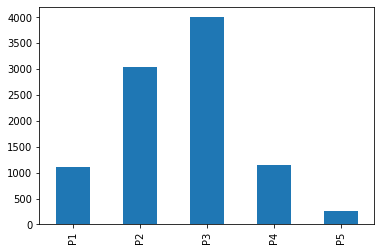

In [38]:
df['Priority'].value_counts().sort_index().plot(kind='bar')
plt.show()

## Train-Test Split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],
                                                    df['Priority'],
                                                    test_size=0.5,
                                                    stratify=df['Priority'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  4775
Size of Test Data  4775


## Applying TF-IDF Vectorizer

In [40]:
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

## Applying SVC Model

In [41]:
model = svm.SVC()
model.fit(X_train_tf, Y_train)

SVC()

In [42]:
print(model.n_support_)

[ 543 1512 1949  566  126]


## Conclusion

In [43]:
percentage=(np.sum(model.n_support_) / len(X_train)) * 100
print("Percentage of data points as support-vectors: ", percentage)

Percentage of data points as support-vectors:  98.3455497382199
